In [1]:
#task 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score,mean_absolute_error 
import pickle

import pandas as pd
df = pd.read_csv ('/Users/christopherbarnes/cmsc25910/Assignment6/income.csv')
print(df)

       Unnamed: 0  age          workclass  fnlwght    education  \
0               0   39          State-gov    77516    Bachelors   
1               1   50   Self-emp-not-inc    83311    Bachelors   
2               2   38            Private   215646      HS-grad   
3               3   53            Private   234721         11th   
4               4   28            Private   338409    Bachelors   
...           ...  ...                ...      ...          ...   
32556       32556   27            Private   257302   Assoc-acdm   
32557       32557   40            Private   154374      HS-grad   
32558       32558   58            Private   151910      HS-grad   
32559       32559   22            Private   201490      HS-grad   
32560       32560   52       Self-emp-inc   287927      HS-grad   

       education-num       marital-status          occupation    relationship  \
0                 13        Never-married        Adm-clerical   Not-in-family   
1                 13   Married-ci

<AxesSubplot:>

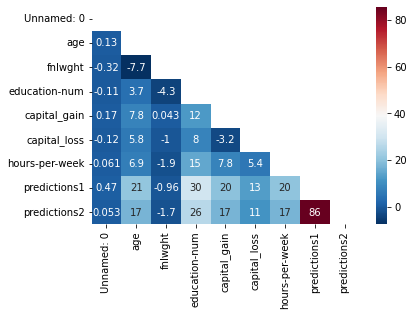

In [2]:
# mask out upper triangle
mask = np.zeros_like(df.corr(), dtype=bool)
mask[np.triu_indices_from(mask)] = True
# heatmap
sns.heatmap(df.corr()*100, 
           cmap='RdBu_r', 
           annot = True, 
           mask = mask)

In [3]:
#working with the data in columns workclass, education, occupation, capital-gain, capital-loss
print(len(df))
df.dropna()
print(len(df))

32561
32561


In [4]:
#workclass
df["workclass"] = df["workclass"].str.replace('?', 'Other', regex=True)
df["workclass"] = df["workclass"].str.replace('Without-pay', 'Other', regex=True)
df["workclass"] = df["workclass"].str.replace('Never-worked', 'Other', regex=True)
df["workclass"] = df["workclass"].str.replace('Local-gov', 'Government', regex=True)
df["workclass"] = df["workclass"].str.replace('Federal-gov', 'Government', regex=True)
df["workclass"] = df["workclass"].str.replace('State-gov', 'Government', regex=True)
print(df.workclass.value_counts())

 Private             22696
 Government           4351
 Self-emp-not-inc     2541
 Other                1857
 Self-emp-inc         1116
Name: workclass, dtype: int64


In [5]:
#education
df["education"] = df["education"].str.replace('Assoc-voc', 'Assoc', regex=True)
df["education"] = df["education"].str.replace('Assoc-acdm', 'Assoc', regex=True)
df["education"] = df["education"].str.replace('11th', 'Gradeschool', regex=True)
df["education"] = df["education"].str.replace('10th', 'Gradeschool', regex=True)
df["education"] = df["education"].str.replace('9th', 'Gradeschool', regex=True)
df["education"] = df["education"].str.replace('7th-8th', 'Gradeschool', regex=True)
df["education"] = df["education"].str.replace('5th-6th', 'Gradeschool', regex=True)
df["education"] = df["education"].str.replace('1st-4th', 'Gradeschool', regex=True)
df["education"] = df["education"].str.replace('Preschool', 'Gradeschool', regex=True)
df["education"] = df["education"].str.replace('12th', 'Gradeschool', regex=True)
df["education"] = df["education"].str.replace('Masters', 'Post Bachelors', regex=True)
df["education"] = df["education"].str.replace('Prof-school', 'Post Bachelors', regex=True)
df["education"] = df["education"].str.replace('Doctorate', 'Post Bachelors', regex=True)
print(df.education.value_counts())

 HS-grad           10501
 Some-college       7291
 Bachelors          5355
 Gradeschool        4253
 Post Bachelors     2712
 Assoc              2449
Name: education, dtype: int64


In [6]:
#occupation
df["occupation"] = df["occupation"].str.replace('Prof-specialty', 'White Collar', regex=True)
df["occupation"] = df["occupation"].str.replace('Craft-repair', 'Blue Collar', regex=True)
df["occupation"] = df["occupation"].str.replace('Exec-managerial', 'White Collar', regex=True)
df["occupation"] = df["occupation"].str.replace('?', 'Other', regex=True)
df["occupation"] = df["occupation"].str.replace('Other-service', 'Other', regex=True)
df["occupation"] = df["occupation"].str.replace('Sales', 'White Collar', regex=True)
df["occupation"] = df["occupation"].str.replace('Adm-clerical', 'White Collar', regex=True)
df["occupation"] = df["occupation"].str.replace('Armed-Forces', 'Other', regex=True)
df["occupation"] = df["occupation"].str.replace('Protective-serv', 'Other', regex=True)
df["occupation"] = df["occupation"].str.replace('Farming-fishing', 'Blue Collar', regex=True)
df["occupation"] = df["occupation"].str.replace('Priv-house-serv', 'Blue Collar', regex=True)
df["occupation"] = df["occupation"].str.replace('Handlers-cleaners', 'Blue Collar', regex=True)
df["occupation"] = df["occupation"].str.replace('Transport-moving', 'Blue Collar', regex=True)
df["occupation"] = df["occupation"].str.replace('Machine-op-inspct', 'Blue Collar', regex=True)
df["occupation"] = df["occupation"].str.replace('Tech-support', 'Other', regex=True)
print(df.occupation.value_counts())

 White Collar    15626
 Blue Collar     10211
 Other            6724
Name: occupation, dtype: int64


In [7]:
#race
#not changing, already narrowed down
print(df.race.value_counts())

 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64


In [8]:
#sex
print(df.sex.value_counts())

 Male      21790
 Female    10771
Name: sex, dtype: int64


In [9]:
df.drop(df.index[df['capital_gain'] == 99999], inplace=True)

In [10]:
#capital-gain

gain = df['capital_gain']

def bin_gain():
    temp = []
    for capital in gain:
        cap = int(capital)
        if cap <= 5000:
            temp.append('0 - 5000')
        elif cap <= 10000:
            temp.append("5001 - 10000")
        elif cap <= 15000:
            temp.append("10001 - 15000")
        elif cap <= 20000:
            temp.append("15000 - 20000")
        elif cap <= 25000:
            temp.append("20001 - 25000")
        else:
            temp.append("Over 25000")
    df['capital_gain'] = temp

bin_gain()
print(df['capital_gain'])
#boxplot = df.boxplot(column=['capital_gain'])

0             0 - 5000
1             0 - 5000
2             0 - 5000
3             0 - 5000
4             0 - 5000
             ...      
32556         0 - 5000
32557         0 - 5000
32558         0 - 5000
32559         0 - 5000
32560    15000 - 20000
Name: capital_gain, Length: 32402, dtype: object


In [11]:
print(df.capital_gain.value_counts())

0 - 5000         30913
5001 - 10000       878
15000 - 20000      360
10001 - 15000      157
Over 25000          56
20001 - 25000       38
Name: capital_gain, dtype: int64


In [12]:
#capital-loss
loss = df['capital_loss']

def bin_loss():
    temp = []
    for capital in loss:
        cap = int(capital)
        if cap <= 1000:
            temp.append('0 - 1000')
        elif cap <= 2000:
            temp.append("1001 - 2000")
        elif cap <= 3000:
            temp.append("2001 - 3000")
        else:
            temp.append("Over 3000")
    df['capital_loss'] = temp

bin_loss()
print(df['capital_loss'])

0        0 - 1000
1        0 - 1000
2        0 - 1000
3        0 - 1000
4        0 - 1000
           ...   
32556    0 - 1000
32557    0 - 1000
32558    0 - 1000
32559    0 - 1000
32560    0 - 1000
Name: capital_loss, Length: 32402, dtype: object


In [13]:
print(df.capital_loss.value_counts())

0 - 1000       30919
1001 - 2000     1158
2001 - 3000      314
Over 3000         11
Name: capital_loss, dtype: int64


In [14]:
#native-country
print(df.native_country.value_counts())

 United-States                 29028
 Mexico                          642
 ?                               576
 Philippines                     197
 Germany                         137
 Canada                          120
 Puerto-Rico                     114
 El-Salvador                     106
 India                            97
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            79
 China                            75
 Italy                            73
 Dominican-Republic               69
 Vietnam                          67
 Guatemala                        64
 Japan                            61
 Poland                           60
 Columbia                         59
 Taiwan                           50
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [15]:
df.drop(columns = ['native_country'], inplace=True)
print(df.columns)
#print(df.native_country.value_counts().index)
#will be ignoring as native country does not necessarily mean the country in which the worker is currently working in

Index(['Unnamed: 0', 'age', 'workclass', 'fnlwght', 'education',
       'education-num', 'marital-status', 'occupation', 'relationship', 'race',
       'sex', 'capital_gain', 'capital_loss', 'hours-per-week', 'income',
       'predictions1', 'predictions2'],
      dtype='object')


In [16]:
#dummy variables for workclass, education, occupation, capital-gain, capital-loss
#also working with sex and race
df = pd.get_dummies(df, columns = ['workclass', 'education', 'occupation', 'capital_gain', 'capital_loss', 'sex', 'race', 'income'])

In [17]:
print(df.columns)

Index(['Unnamed: 0', 'age', 'fnlwght', 'education-num', 'marital-status',
       'relationship', 'hours-per-week', 'predictions1', 'predictions2',
       'workclass_ Government', 'workclass_ Other', 'workclass_ Private',
       'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc',
       'education_ Assoc', 'education_ Bachelors', 'education_ Gradeschool',
       'education_ HS-grad', 'education_ Post Bachelors',
       'education_ Some-college', 'occupation_ Blue Collar',
       'occupation_ Other', 'occupation_ White Collar',
       'capital_gain_0 - 5000', 'capital_gain_10001 - 15000',
       'capital_gain_15000 - 20000', 'capital_gain_20001 - 25000',
       'capital_gain_5001 - 10000', 'capital_gain_Over 25000',
       'capital_loss_0 - 1000', 'capital_loss_1001 - 2000',
       'capital_loss_2001 - 3000', 'capital_loss_Over 3000', 'sex_ Female',
       'sex_ Male', 'race_ Amer-Indian-Eskimo', 'race_ Asian-Pac-Islander',
       'race_ Black', 'race_ Other', 'race_ White', 'incom

In [18]:
df.to_csv('/Users/christopherbarnes/cmsc25910/Assignment6/cleanincomedata.csv')

In [131]:
import numpy as np
import pandas as pd

# define the data/predictors as the pre-set feature names  
X = df[['workclass_ Government', 'workclass_ Other', 'workclass_ Private',
       'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc',
       'education_ Assoc', 'education_ Bachelors', 'education_ Gradeschool',
       'education_ HS-grad', 'education_ Post Bachelors',
       'education_ Some-college', 'occupation_ Blue Collar',
       'occupation_ Other', 'occupation_ White Collar',
       'capital_gain_0 - 5000', 'capital_gain_10001 - 15000',
       'capital_gain_15000 - 20000', 'capital_gain_20001 - 25000',
       'capital_gain_5001 - 10000', 'capital_gain_Over 25000',
       'capital_loss_0 - 1000', 'capital_loss_1001 - 2000',
       'capital_loss_2001 - 3000', 'capital_loss_Over 3000', 'sex_ Female',
       'sex_ Male', 'race_ Amer-Indian-Eskimo', 'race_ Asian-Pac-Islander',
       'race_ Black', 'race_ Other', 'race_ White', 'predictions1', 'predictions2']]
y = pd.DataFrame(df, columns=["income_ <=50K"])


#np.any(np.isnan(X))
#np.all(np.isfinite(X))
#X[np.isfinite(X) == True] = 0
#print(X_test)

In [137]:
from sklearn import tree
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)
clf = tree.DecisionTreeClassifier()
print(X_train.columns)
X_train.drop(columns=['predictions1','predictions2'])
clf = clf.fit(X_train, y_train)

Index(['workclass_ Government', 'workclass_ Other', 'workclass_ Private',
       'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc',
       'education_ Assoc', 'education_ Bachelors', 'education_ Gradeschool',
       'education_ HS-grad', 'education_ Post Bachelors',
       'education_ Some-college', 'occupation_ Blue Collar',
       'occupation_ Other', 'occupation_ White Collar',
       'capital_gain_0 - 5000', 'capital_gain_10001 - 15000',
       'capital_gain_15000 - 20000', 'capital_gain_20001 - 25000',
       'capital_gain_5001 - 10000', 'capital_gain_Over 25000',
       'capital_loss_0 - 1000', 'capital_loss_1001 - 2000',
       'capital_loss_2001 - 3000', 'capital_loss_Over 3000', 'sex_ Female',
       'sex_ Male', 'race_ Amer-Indian-Eskimo', 'race_ Asian-Pac-Islander',
       'race_ Black', 'race_ Other', 'race_ White', 'predictions1',
       'predictions2'],
      dtype='object')


In [21]:
predicted = clf.predict(X_test)
#print(len(predicted))
#print(predicted)

actual = list(y_test['income_ <=50K'])
#print(len(actual))
#print(actual)

In [22]:
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

accuracy = accuracy_score(actual, predicted)
print('accuracy:')
print(accuracy)

precision = precision_score(actual, predicted)
print('precision:')
print(precision)

recall = recall_score(actual, predicted, average='binary')
print('recall:')
print(recall)

f1 = f1_score(actual, predicted, average='binary')
print('f1:')
print(f1)

accuracy:
0.8242555161240549
precision:
0.8535957329409601
recall:
0.9311797752808989
f1:
0.8907014681892333


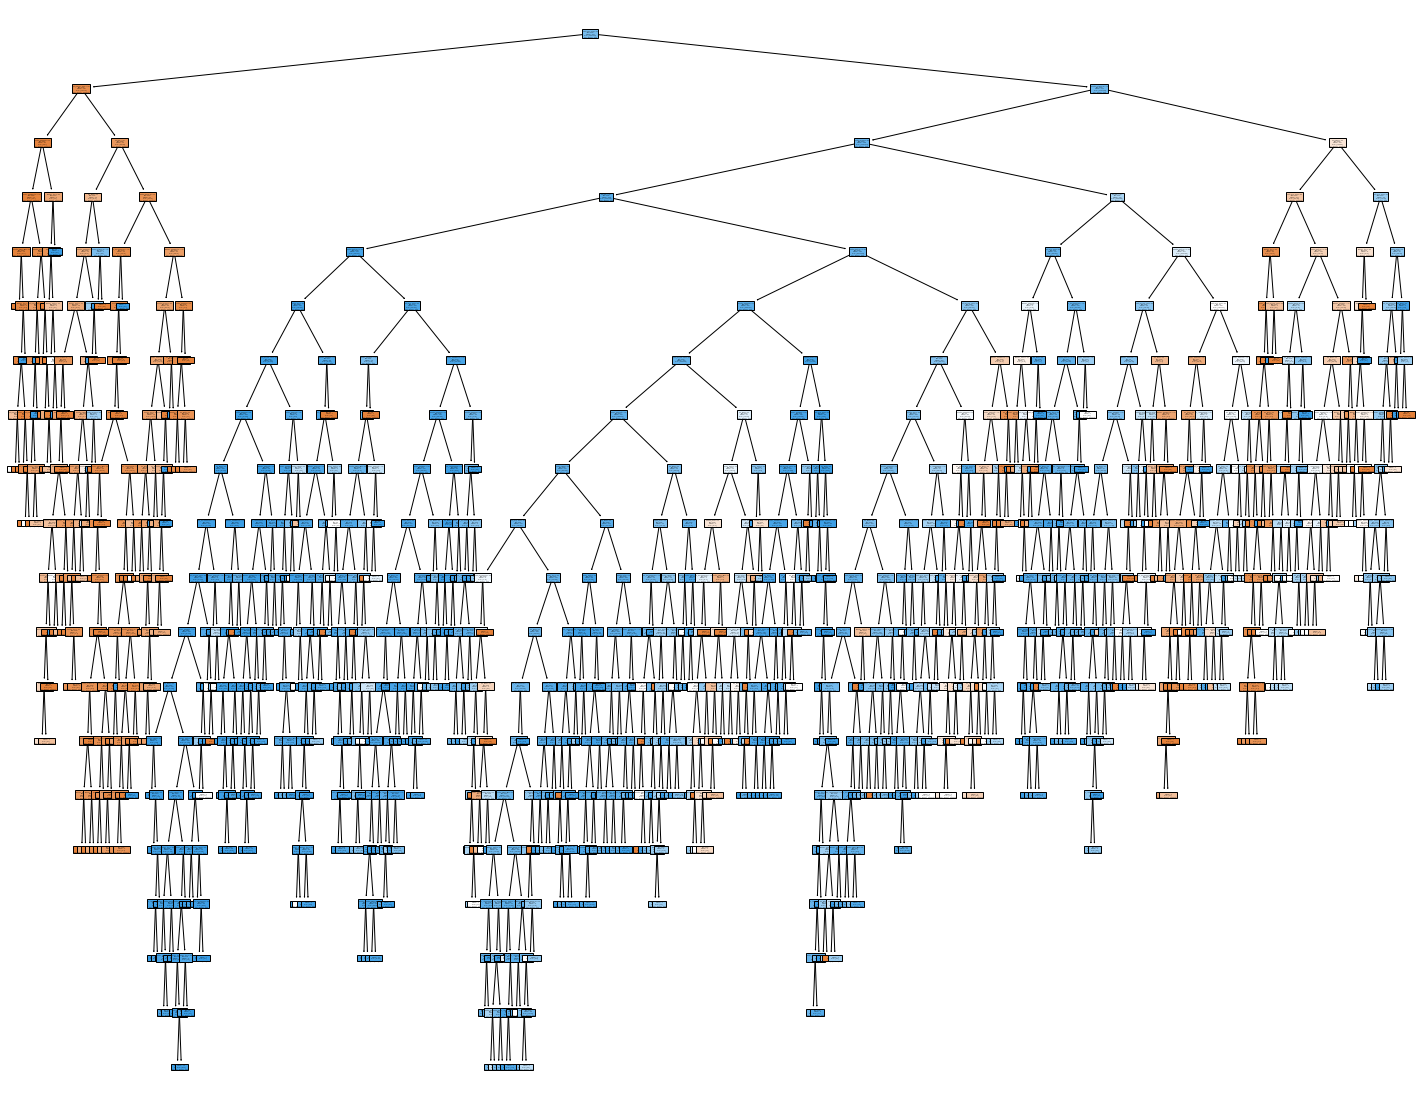

In [23]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=X_train.columns,  
                   class_names=X_test.columns,
                   filled=True)

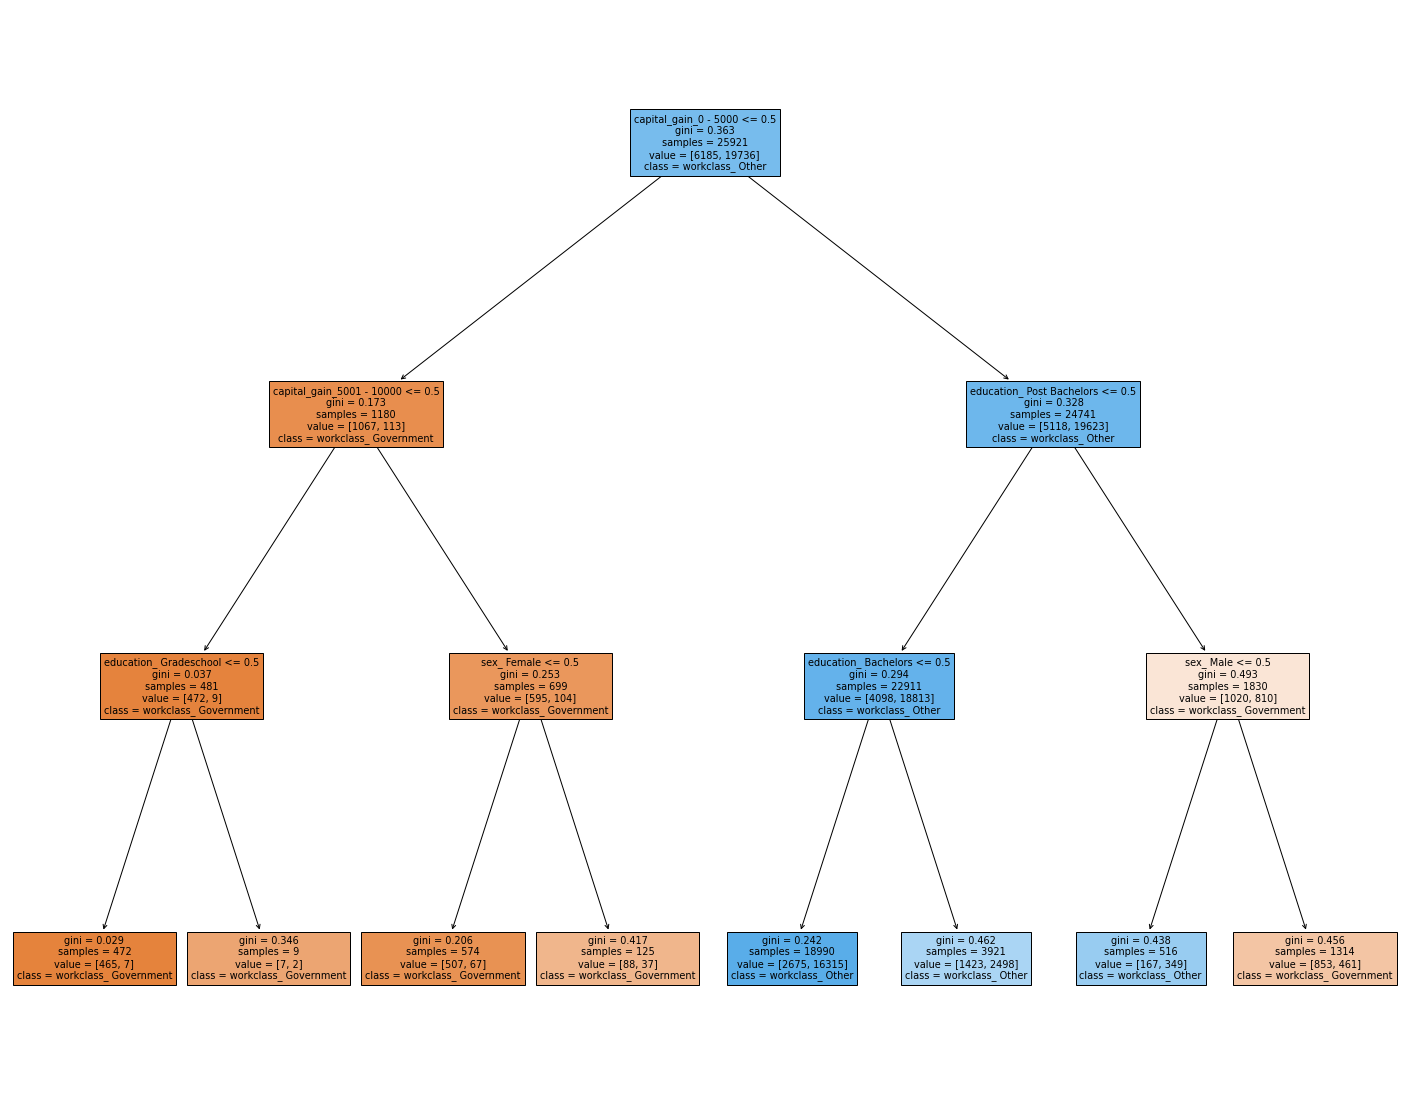

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)
clf = tree.DecisionTreeClassifier(max_depth=3)
clf = clf.fit(X_train, y_train)

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=X_train.columns,  
                   class_names=X_test.columns,
                   filled=True)

In [28]:
# confusion matrix in sklearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# confusion matrix
matrix = confusion_matrix(actual,predicted, labels=[1,0])
print('Confusion matrix all variables : \n',matrix)

# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values :')
print('true positive:')
print(tp)
print('false negative:')
print(fn)
print('false positive:')
print(fp)
print('true negative')
print(tn)
print()

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(actual,predicted,labels=[1,0])
print('Classification report : \n',matrix)

Confusion matrix : 
 [[4641  343]
 [ 796  701]]
Outcome values :
true positive:
4641
false negative:
343
false positive:
796
true negative
701

Classification report : 
               precision    recall  f1-score   support

           1       0.85      0.93      0.89      4984
           0       0.67      0.47      0.55      1497

    accuracy                           0.82      6481
   macro avg       0.76      0.70      0.72      6481
weighted avg       0.81      0.82      0.81      6481



In [35]:
#'sex_ Female','sex_ Male'
female = X_test['sex_ Female']
male = X_test['sex_ Male']

In [36]:
#'race_ Amer-Indian-Eskimo', 'race_ Asian-Pac-Islander','race_ Black', 'race_ Other', 'race_ White'
aie = X_test['race_ Amer-Indian-Eskimo']
api = X_test['race_ Asian-Pac-Islander']
b = X_test['race_ Black']
other = X_test['race_ Other']
w = X_test['race_ White']

In [93]:
genders = ['sex_ Female','sex_ Male']
races = ['race_ Amer-Indian-Eskimo','race_ Asian-Pac-Islander','race_ Black','race_ Other','race_ White']

In [68]:
#want to get values from both actual and predicted from the given inputted binary array

#inputs are the characteristic being observed, the predicted values, and the actual values
def specific_characteristic(characteristic, pred, act):
    ans = []
    
    temppredict = []
    tempactual = []
    
    i = 0
    
    char_keys = characteristic.keys()
    
    
    for key in char_keys:
        binary = characteristic[key]
        
        if binary == 1:
            temppredict.append(pred[i])
            tempactual.append(act[i]) 
        else:
            pass
        
        i += 1
    #print(i)
    #print(len(temppredict))
    #print(len(tempactual))
    return [temppredict,tempactual]
        

#print(female)
#specific_characteristic(female, predicted, actual)

In [120]:
#calculating proportion of a single group for numerator
def numerator(individual):
    ind = X_test[individual]
    prediction = specific_characteristic(ind, predicted, actual)[0]
    count = 0
    for pred in prediction:
        if pred == 1:
            count += 1
    proportion = count / len(prediction)
    #print(count)
    #print(len(prediction))
    return proportion


def denominator(group, individual):
    total_over_income = 0
    total_predictions = 0
    for g in group:
        if g != individual:
            #print('here')
            one_cat = X_test[g]
            prediction = specific_characteristic(one_cat, predicted, actual)[0]
            count = 0
            for pred in prediction:
                if pred == 1:
                    count += 1
            total_over_income += count
            total_predictions += len(prediction)
    proportion = total_over_income / total_predictions
    return proportion

print(numerator('sex_ Female'))
print(denominator(genders, 'sex_ Female'))
print(denominator(races, 'race_ Amer-Indian-Eskimo'))

0.9630156472261735
0.7790484903934126
0.8380610972568578


In [121]:
#particular = strinf column name
#rest = group array
def disp_imp(particular, group):
    num = numerator(particular)
    denom = denominator(group, particular)
    di = num/denom
    return di

In [122]:
#genders -> 'sex_ Female','sex_ Male'
#races ->'race_ Amer-Indian-Eskimo','race_ Asian-Pac-Islander','race_ Black','race_ Other','race_ White'

#genders
di_female = disp_imp('sex_ Female', genders)
di_male = disp_imp('sex_ Male', genders)

print('disparate impacts; genders:')
print('female:')
print(di_female)
print()
print('male:')
print(di_male)
print()

#races
di_american_indian_eskimo = disp_imp('race_ Amer-Indian-Eskimo', races)
di_asian_pacific_islander = disp_imp('race_ Asian-Pac-Islander', races)
di_black = disp_imp('race_ Black', races)
di_other = disp_imp('race_ Other', races)
di_white = disp_imp('race_ White', races)

print('disparate impacts; races:')
print('american indian eskimo:')
print(di_american_indian_eskimo)
print()
print('asian pacific islander:')
print(di_asian_pacific_islander)
print()
print('black:')
print(di_black)
print()
print('other:')
print(di_other)
print()
print('white:')
print(di_white)
print()

disparate impacts; genders:
female:
1.236143396850508

male:
0.808967634780752

disparate impacts; races:
american indian eskimo:
1.1014434700505

asian pacific islander:
0.9978987042746991

black:
1.1536153225269605

other:
1.1294211685417108

white:
0.891874318130396



In [87]:
new_actual = specific_characteristic(female, predicted, actual)[1]
new_predicted = specific_characteristic(female, predicted, actual)[0]


# confusion matrix
matrix = confusion_matrix(new_actual_fem,new_predicted_fem, labels=[1,0])
print('Confusion matrix female gender : \n',matrix)

# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(new_actual,new_predicted,labels=[1,0]).reshape(-1)
print('Outcome values :')
print('true positive:')
print(tp)
print('false negative:')
print(fn)
print('false positive:')
print(fp)
print('true negative')
print(tn)
print()

#False Positive rate = FP/FP+TN
fpr = fp / (fp + tn)
print('false positive rate:')
print(fpr)
print()

#False Negative Rate: FN/FN+TP
fnr = fn / (fn + tp)
print('flase negative rate:')
print(fnr)
print()

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(new_actual,new_predicted,labels=[1,0])
print('Classification report : \n',matrix)

Confusion matrix female gender : 
 [[1870   27]
 [ 161   51]]
Outcome values :
true positive:
1870
false negative:
27
false positive:
161
true negative
51

false positive rate:
0.7594339622641509

flase negative rate:
0.014232999472851872

Classification report : 
               precision    recall  f1-score   support

           1       0.92      0.99      0.95      1897
           0       0.65      0.24      0.35       212

    accuracy                           0.91      2109
   macro avg       0.79      0.61      0.65      2109
weighted avg       0.89      0.91      0.89      2109



In [88]:
new_actual = specific_characteristic(male, predicted, actual)[1]
new_predicted = specific_characteristic(male, predicted, actual)[0]


# confusion matrix
matrix = confusion_matrix(new_actual,new_predicted, labels=[1,0])
print('Confusion matrix male gender : \n',matrix)

# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(new_actual,new_predicted,labels=[1,0]).reshape(-1)
print('Outcome values :')
print('true positive:')
print(tp)
print('false negative:')
print(fn)
print('false positive:')
print(fp)
print('true negative')
print(tn)
print()

#False Positive rate = FP/FP+TN
fpr = fp / (fp + tn)
print('false positive rate:')
print(fpr)
print()

#False Negative Rate: FN/FN+TP
fnr = fn / (fn + tp)
print('flase negative rate:')
print(fnr)
print()

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(new_actual,new_predicted,labels=[1,0])
print('Classification report : \n',matrix)

Confusion matrix male gender : 
 [[2771  316]
 [ 635  650]]
Outcome values :
true positive:
2771
false negative:
316
false positive:
635
true negative
650

false positive rate:
0.49416342412451364

flase negative rate:
0.10236475542597992

Classification report : 
               precision    recall  f1-score   support

           1       0.81      0.90      0.85      3087
           0       0.67      0.51      0.58      1285

    accuracy                           0.78      4372
   macro avg       0.74      0.70      0.72      4372
weighted avg       0.77      0.78      0.77      4372



In [71]:
new_actual = specific_characteristic(aie, predicted, actual)[1]
new_predicted = specific_characteristic(aie, predicted, actual)[0]


# confusion matrix
matrix = confusion_matrix(new_actual,new_predicted, labels=[1,0])
print('Confusion matrix American Indian Eskimo Race : \n',matrix)

# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(new_actual,new_predicted,labels=[1,0]).reshape(-1)
print('Outcome values :')
print('true positive:')
print(tp)
print('false negative:')
print(fn)
print('false positive:')
print(fp)
print('true negative')
print(tn)
print()

#False Positive rate = FP/FP+TN
fpr = fp / (fp + tn)
print('false positive rate:')
print(fpr)
print()

#False Negative Rate: FN/FN+TP
fnr = fn / (fn + tp)
print('flase negative rate:')
print(fnr)
print()

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(new_actual,new_predicted,labels=[1,0])
print('Classification report : \n',matrix)

Confusion matrix American Indian Eskimo Race : 
 [[54  4]
 [ 6  1]]
Outcome values :
true positive:
54
false negative:
4
false positive:
6
true negative
1

false positive rate:
0.8571428571428571

flase negative rate:
0.06896551724137931

Classification report : 
               precision    recall  f1-score   support

           1       0.90      0.93      0.92        58
           0       0.20      0.14      0.17         7

    accuracy                           0.85        65
   macro avg       0.55      0.54      0.54        65
weighted avg       0.82      0.85      0.83        65



In [72]:
new_actual = specific_characteristic(api, predicted, actual)[1]
new_predicted = specific_characteristic(api, predicted, actual)[0]


# confusion matrix
matrix = confusion_matrix(new_actual,new_predicted, labels=[1,0])
print('Confusion matrix Asian Pacific Islander Race : \n',matrix)

# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(new_actual,new_predicted,labels=[1,0]).reshape(-1)
print('Outcome values :')
print('true positive:')
print(tp)
print('false negative:')
print(fn)
print('false positive:')
print(fp)
print('true negative')
print(tn)
print()

#False Positive rate = FP/FP+TN
fpr = fp / (fp + tn)
print('false positive rate:')
print(fpr)
print()

#False Negative Rate: FN/FN+TP
fnr = fn / (fn + tp)
print('flase negative rate:')
print(fnr)
print()

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(new_actual,new_predicted,labels=[1,0])
print('Classification report : \n',matrix)

Confusion matrix Asian Pacific Islander Race : 
 [[144  16]
 [ 36  19]]
Outcome values :
true positive:
144
false negative:
16
false positive:
36
true negative
19

false positive rate:
0.6545454545454545

flase negative rate:
0.1

Classification report : 
               precision    recall  f1-score   support

           1       0.80      0.90      0.85       160
           0       0.54      0.35      0.42        55

    accuracy                           0.76       215
   macro avg       0.67      0.62      0.63       215
weighted avg       0.73      0.76      0.74       215



In [73]:
new_actual = specific_characteristic(b, predicted, actual)[1]
new_predicted = specific_characteristic(b, predicted, actual)[0]


# confusion matrix
matrix = confusion_matrix(new_actual,new_predicted, labels=[1,0])
print('Confusion matrix Black Race : \n',matrix)

# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(new_actual,new_predicted,labels=[1,0]).reshape(-1)
print('Outcome values :')
print('true positive:')
print(tp)
print('false negative:')
print(fn)
print('false positive:')
print(fp)
print('true negative')
print(tn)
print()

#False Positive rate = FP/FP+TN
fpr = fp / (fp + tn)
print('false positive rate:')
print(fpr)
print()

#False Negative Rate: FN/FN+TP
fnr = fn / (fn + tp)
print('flase negative rate:')
print(fnr)
print()

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(new_actual,new_predicted,labels=[1,0])
print('Classification report : \n',matrix)

Confusion matrix Black Race : 
 [[527   9]
 [ 38  18]]
Outcome values :
true positive:
527
false negative:
9
false positive:
38
true negative
18

false positive rate:
0.6785714285714286

flase negative rate:
0.016791044776119403

Classification report : 
               precision    recall  f1-score   support

           1       0.93      0.98      0.96       536
           0       0.67      0.32      0.43        56

    accuracy                           0.92       592
   macro avg       0.80      0.65      0.70       592
weighted avg       0.91      0.92      0.91       592



In [74]:
new_actual = specific_characteristic(w, predicted, actual)[1]
new_predicted = specific_characteristic(w, predicted, actual)[0]


# confusion matrix
matrix = confusion_matrix(new_actual,new_predicted, labels=[1,0])
print('Confusion matrix White Race : \n',matrix)

# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(new_actual,new_predicted,labels=[1,0]).reshape(-1)
print('Outcome values :')
print('true positive:')
print(tp)
print('false negative:')
print(fn)
print('false positive:')
print(fp)
print('true negative')
print(tn)
print()

#False Positive rate = FP/FP+TN
fpr = fp / (fp + tn)
print('false positive rate:')
print(fpr)
print()

#False Negative Rate: FN/FN+TP
fnr = fn / (fn + tp)
print('flase negative rate:')
print(fnr)
print()

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(new_actual,new_predicted,labels=[1,0])
print('Classification report : \n',matrix)

Confusion matrix White Race : 
 [[3866  313]
 [ 713  661]]
Outcome values :
true positive:
3866
false negative:
313
false positive:
713
true negative
661

false positive rate:
0.5189228529839883

flase negative rate:
0.0748983010289543

Classification report : 
               precision    recall  f1-score   support

           1       0.84      0.93      0.88      4179
           0       0.68      0.48      0.56      1374

    accuracy                           0.82      5553
   macro avg       0.76      0.70      0.72      5553
weighted avg       0.80      0.82      0.80      5553



In [75]:
new_actual = specific_characteristic(other, predicted, actual)[1]
new_predicted = specific_characteristic(other, predicted, actual)[0]


# confusion matrix
matrix = confusion_matrix(new_actual,new_predicted, labels=[1,0])
print('Confusion matrix Other Race : \n',matrix)

# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(new_actual,new_predicted,labels=[1,0]).reshape(-1)
print('Outcome values :')
print('true positive:')
print(tp)
print('false negative:')
print(fn)
print('false positive:')
print(fp)
print('true negative')
print(tn)
print()

#False Positive rate = FP/FP+TN
fpr = fp / (fp + tn)
print('false positive rate:')
print(fpr)
print()

#False Negative Rate: FN/FN+TP
fnr = fn / (fn + tp)
print('flase negative rate:')
print(fnr)
print()

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(new_actual,new_predicted,labels=[1,0])
print('Classification report : \n',matrix)

Confusion matrix Other Race : 
 [[50  1]
 [ 3  2]]
Outcome values :
true positive:
50
false negative:
1
false positive:
3
true negative
2

false positive rate:
0.6

flase negative rate:
0.0196078431372549

Classification report : 
               precision    recall  f1-score   support

           1       0.94      0.98      0.96        51
           0       0.67      0.40      0.50         5

    accuracy                           0.93        56
   macro avg       0.81      0.69      0.73        56
weighted avg       0.92      0.93      0.92        56



In [140]:
p1 = list(X_test['predictions1'])
p2 = list(X_test['predictions2'])

In [146]:
def prop_pred(arr1, arr2):
    i = 0
    same = 0
    while i < len(arr1):
        pred1 = arr1[i]
        pred2 = arr2[i]
        if pred1 == pred2:
            same += 1
        i += 1
    prop = same/len(arr1)
    return prop

#gender
print('proportions comparing predictions 1 and 2 the predictions according to gender:')
print()
specpred = specific_characteristic(female, predicted, actual)[0]
print('female predicted vs predictions1:')
femalep1 = prop_pred(specpred, p1)
print(femalep1)
print()
print('female predicted vs predictions2:')
femalep2 = prop_pred(specpred, p2)
print(femalep2)
print()

specpred = specific_characteristic(male, predicted, actual)[0]
print('male predicted vs predictions1:')
malep1 = prop_pred(specpred, p1)
print(malep1)
print('male predicted vs predictions2:')
malep2 = prop_pred(specpred, p2)
print(malep2)
print()
print()
print()

#race
print('proportions comparing predictions 1 and 2 the predictions according to gender:')
print()
specpred = specific_characteristic(aie, predicted, actual)[0]
print('american indian eskimo predicted vs predictions1:')
aiep1 = prop_pred(specpred, p1)
print(aiep1)
print('american indian eskimo predicted vs predictions2:')
aiep2 = prop_pred(specpred, p2)
print(aiep2)
print()

specpred = specific_characteristic(api, predicted, actual)[0]
print('asian pacific islander predicted vs predictions1:')
apip1 = prop_pred(specpred, p1)
print(apip1)
print('asian pacific islander predicted vs predictions2:')
apip2 = prop_pred(specpred, p2)
print(apip2)
print()

specpred = specific_characteristic(b, predicted, actual)[0]
print('black predicted vs predictions1:')
bp1 = prop_pred(specpred, p1)
print(bp1)
print('black predicted vs predictions2:')
bp2 = prop_pred(specpred, p2)
print(bp2)
print()

specpred = specific_characteristic(other, predicted, actual)[0]
print('other predicted vs predictions1:')
otherp1 = prop_pred(specpred, p1)
print(otherp1)
print('other predicted vs predictions2:')
otherp2 = prop_pred(specpred, p2)
print(otherp2)
print()

specpred = specific_characteristic(w, predicted, actual)[0]
print('white predicted vs predictions1:')
whitep1 = prop_pred(specpred, p1)
print(whitep1)
print('white predicted vs predictions2:')
whitep2 = prop_pred(specpred, p2)
print(whitep2)
print()

proportions comparing predictions 1 and 2 the predictions according to gender:

female predicted vs predictions1:
0.27358937885253676

female predicted vs predictions2:
0.285443338074917

male predicted vs predictions1:
0.35750228728270816
male predicted vs predictions2:
0.36596523330283626



proportions comparing predictions 1 and 2 the predictions according to gender:

american indian eskimo predicted vs predictions1:
0.2923076923076923
american indian eskimo predicted vs predictions2:
0.2923076923076923

asian pacific islander predicted vs predictions1:
0.3627906976744186
asian pacific islander predicted vs predictions2:
0.34418604651162793

black predicted vs predictions1:
0.2989864864864865
black predicted vs predictions2:
0.2989864864864865

other predicted vs predictions1:
0.19642857142857142
other predicted vs predictions2:
0.21428571428571427

white predicted vs predictions1:
0.3426976409148208
white predicted vs predictions2:
0.356383936610841



In [153]:
#predictions over 50000 income in either array
#want to find the proportion of predictions when each race and gender is 1
#takes in a list of the given race or gender and outputs the list of prediction1 and prediction2 for the 
#corresponding arrays
p1 = list(X_test['predictions1'])
p2 = list(X_test['predictions2'])
def predictions_proportions(category,prediction1,prediction2):
    pred1 = []
    pred2 = []
    i = 0
    arr = list(category)
    while i < len(arr):
        temp = arr[i]
        if temp == 1:
            pred1.append(prediction1[i])
            pred2.append(prediction2[i])
        i+=1
    return [pred1, pred2]

def prop_preds(preds):
    count = 0
    for p in preds:
        if p == 1:
            count += 1
    ans = count / len(preds)
    return ans

In [155]:
print('gendered prediction proportions for prediction1 and prediction2:')
print()
print('female prediction1:')
female_pred_prop1 = prop_preds(predictions_proportions(female,p1,p2)[0])
print(female_pred_prop1)
print('female prediction2:')
female_pred_prop2 = prop_preds(predictions_proportions(female,p1,p2)[1])
print(female_pred_prop1)
print()
print('male prediction1:')
male_pred_prop1 = prop_preds(predictions_proportions(male,p1,p2)[0])
print(male_pred_prop1)
print('male prediction2:')
male_pred_prop2 = prop_preds(predictions_proportions(male,p1,p2)[1])
print(male_pred_prop2)
print()

print()
print()
print()

print('race prediction proportions for prediction1 and prediction2:')
print('american indian eskimo prediction1:')
aie_pred_prop1 = prop_preds(predictions_proportions(aie,p1,p2)[0])
print(aie_pred_prop1)
print('american indian eskimo prediction2:')
aie_pred_prop2 = prop_preds(predictions_proportions(aie,p1,p2)[1])
print(aie_pred_prop2)
print()

print('asian pacific islander prediction1:')
api_pred_prop1 = prop_preds(predictions_proportions(api,p1,p2)[0])
print(api_pred_prop1)
print('asian pacific islander prediction2:')
api_pred_prop2 = prop_preds(predictions_proportions(api,p1,p2)[1])
print(api_pred_prop2)
print()

print('black prediction1:')
b_pred_prop1 = prop_preds(predictions_proportions(b,p1,p2)[0])
print(b_pred_prop1)
print('black prediction2:')
b_pred_prop2 = prop_preds(predictions_proportions(b,p1,p2)[1])
print(b_pred_prop2)
print()

print('white prediction1:')
w_pred_prop1 = prop_preds(predictions_proportions(w,p1,p2)[0])
print(w_pred_prop1)
print('white prediction2:')
w_pred_prop2 = prop_preds(predictions_proportions(w,p1,p2)[1])
print(w_pred_prop2)
print()

print('other prediction1:')
other_pred_prop1 = prop_preds(predictions_proportions(other,p1,p2)[0])
print(other_pred_prop1)
print('other prediction2:')
other_pred_prop2 = prop_preds(predictions_proportions(other,p1,p2)[1])
print(other_pred_prop2)
print()

gendered prediction proportions for prediction1 and prediction2:

female prediction1:
0.13560929350403034
female prediction2:
0.13560929350403034

male prediction1:
0.3083257090576395
male prediction2:
0.320448307410796




race prediction proportions for prediction1 and prediction2:
american indian eskimo prediction1:
0.13846153846153847
american indian eskimo prediction2:
0.18461538461538463

asian pacific islander prediction1:
0.2651162790697674
asian pacific islander prediction2:
0.2744186046511628

black prediction1:
0.14020270270270271
black prediction2:
0.11824324324324324

white prediction1:
0.2663425175580767
white prediction2:
0.2884927066450567

other prediction1:
0.10714285714285714
other prediction2:
0.14285714285714285



In [159]:
#analyzing intersectionality
#White Women and Black Men
p1 = list(X_test['predictions1'])
p2 = list(X_test['predictions2'])
def predictions_proportions_2_cats(category1,category2,prediction1,prediction2):
    pred1 = []
    pred2 = []
    i = 0
    arr1 = list(category1)
    arr2 = list(category2)
    while i < len(arr1):
        temp1 = arr1[i]
        temp2 = arr2[i]
        if temp1 == 1 and temp2 == 1:
            pred1.append(prediction1[i])
            pred2.append(prediction2[i])
        i+=1
    return [pred1, pred2]

In [161]:
print('intersectionality of white women:')
print('white women p1:')
white_women_p1 = prop_preds(predictions_proportions_2_cats(w,female,p1,p2)[0])
print(white_women_p1)
print()
print('white women p2:')
white_women_p2 = prop_preds(predictions_proportions_2_cats(w,female,p1,p2)[1])
print(white_women_p2)
print()

print('intersectionality of black men:')
print('black men p1:')
black_men_p1 = prop_preds(predictions_proportions_2_cats(b,male,p1,p2)[0])
print(black_men_p1)
print()
print('black men p2:')
black_men_p2 = prop_preds(predictions_proportions_2_cats(b,male,p1,p2)[1])
print(black_men_p2)
print()

intersectionality of white women:
white women p1:
0.14906103286384975

white women p2:
0.18251173708920188

intersectionality of black men:
black men p1:
0.20962199312714777

black men p2:
0.14776632302405499

